Accuracy: 0.9571428571428572
Confusion Matrix:
 [[93  2]
 [ 4 41]]
Classification Report:
               precision    recall  f1-score   support

           2       0.96      0.98      0.97        95
           4       0.95      0.91      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



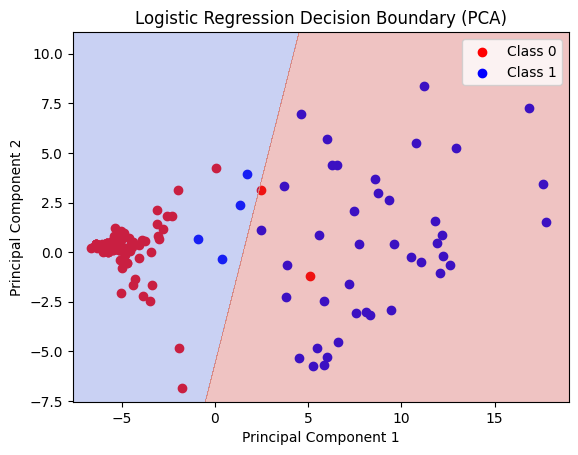

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
data = pd.read_csv('breast-cancer-train.csv')
x = data.iloc[:, 0:-1]
y = data.iloc[:,-1:].values.ravel()
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
model = LogisticRegression()
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
plt.scatter(x_test_pca[y_test == 2][:, 0], x_test_pca[y_test == 2][:, 1], color='red', label='Class 0')
# Plot points for class 1
plt.scatter(x_test_pca[y_test == 4][:, 0], x_test_pca[y_test == 4][:, 1], color='blue', label='Class 1')
# Plot decision boundary
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
